# N-gram 언어 모델: N-gram Language Model
* 카운트 기반 통계적 접근을 사용하기 때문에 SLM의 일종입니다.
* 다만, 이전처럼 모든 단어를 고려하는 것이 아니라 일부 단어만 고려하는 접근 방법을 사용합니다.
* 이때, 몇 개의 단어를 보느냐를 결정하는데 이것이 n-gram에서의 n이 가지는 의미입니다.

## 1. 코퍼스에서 카운트하지 못하는 경우의 감소
* SLM에서의 문제는 훈련 코퍼스에 확률을 계산하고 싶은 문장이나 단어가 없을 수 있다는 점이었습니다.
* 그리고, 확률을 계산하고 싶은 문장이 길어질수록 갖고있는 코퍼스에서 그 문장이 존재하지 않을 가능성이 높습니다. == 카운트하지 못할 가능성이 높습니다.
* 그런데 다음과 같이 참고하는 단어들을 줄이면 카운트할 가능성이 높아집니다:

    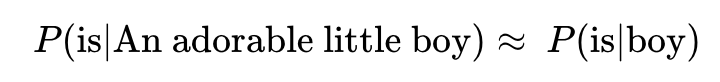
    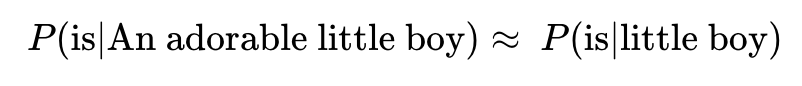
* 앞 단어 중 임의의 개수만 포함해서 카운트하여 근사하자는 것으로 이렇게 하면 갖고 있는 코퍼스에서 해당 단어의 시퀀스를 카운트할 확률이 높아집니다.

## 2. N-gram
* n-gram은 n개의 연속적인 단어 나열을 의미합니다. 즉, 갖고 있는 코퍼스에서 단어 뭉치 단위로 끊어서 이를 하나의 토큰으로 간주합니다.
* 예를 들어 'An adorable little boy is spreading smiles' 문장이 있을 때, 각 n에 대해서 n-gram을 전부 구해보면:
    * **uni**grams: an, adorable, little, boy, is spreading, smiles
    * **bi**grams: an adorable, adorable little, little boy, boy is, is spreading, spreading smiles
    * **tri**grams: an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles
    * **4**-grams: an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles
* n-gram을 통한 언어 모델에서는 다음에 나올 단어의 예측은 오직 n-1개의 단어에만 의존합니다. 4-gram 언어 모델의 경우, spreading 다음에 올 단어를 예측하는 것의 예시:

    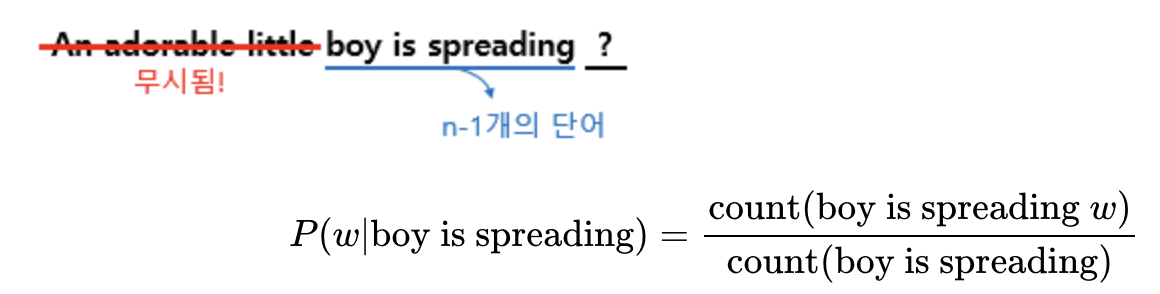
* boy is spreading이 1000번 등장하고 이후에 insults와 smiles가 각각 500번, 200번 등장했다고 합시다. 그럼 확률적 선택에 따라 insults가 더 맞다고 판단하게 됩니다:

    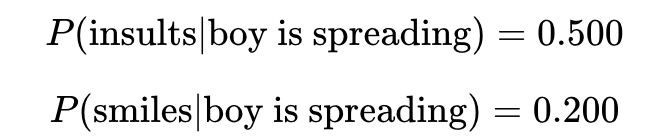

## 3. N-gram LM의 한계
* n-gram은 앞의 단어 몇 개만 보다보니 의도하고 싶은 대로 문장을 끝맺음하지 못하는 경우가 생깁니다.
* 예를 들어, '작고 사랑스러운'이라는 수식어가 반영되지 않았지만 해당 수식어까지 모두 고려하는 언어 모델이었다면 과연 '작고 사랑스러운 소년'이 '웃음 지었다' 대신 '모욕을 퍼트렸다'로 선택되었을까요?
* 결론적으로 앞뒤 문맥이 전혀 연결이 안 되어 전체 문장을 고려한 언어 모델보다 정확도가 떨어질 수 밖에 없습니다.
* 한계점 정리:
    1. 희소 문제:Sparsity problem, 완화만 했을 뿐 여전히 희소 문제가 존재합니다.
    2. n을 선택하는 것은 trade-off 문제: n이 커질수록 모델 사이즈도 커지지만 정확도는 올라갑니다. 하지만 희소 문제가 발생하기도 해서 n을 작게 선택하면 훈련 코퍼스에서 카운트는 잘 되겠지만 근사의 정확도는 현실의 확률분포와 멀어집니다. **보통 n은 최대 5를 넘게 잡아서는 안 된다고 권장하고 있습니다.**
        * 월스트리트 저널에서 3,800만 개의 단어 토큰에 대하여 n-gram 언어 모델 학습 후, 1,500만 개의 테스트 데이터에 대해 테스트한 결과 by 스탠퍼드 대학교: (Perplexity는 낮으면 낮을수록 좋습니다.)
            
            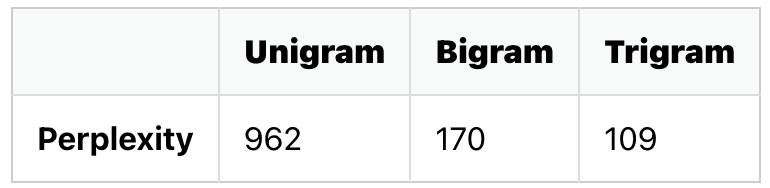

## 4. 적용 분야(Domain)에 맞는 코퍼스의 수집
* 관련 분야(마케팅, 의료 등)마다 사용하는 용어가 다르기 때문에 해당 도메인의 코퍼스를 사용한다면 당연히 언어 모델이 제대로 된 언어 생성을 할 가능성이 높아집니다.
* 이는 모델의 약점이 되기도 하는데, 훈련에 사용된 도메인 코퍼스가 무엇이냐에 따라서 성능이 비약적으로 달라지기 때문입니다.

## 5. 인공 신경망을 이용한 언어 모델: NN Based LM
* 따라서, N-gram LM의 한계점을 극복하기 위해 분모, 분자가 0이 되는 것을 방지하는 등 여러 일반화(generalizaiton) 방법들이 존재합니다.
* 하지만 본질적으로 n-gram LM의 취약점을 완전히 해결하지 못하였고, 이를 위한 대안으로 NN Based LM이 많이 사용되기 시작했습니다.